<a href="https://colab.research.google.com/github/hurmuzz/mini_customer_spend/blob/main/mini_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_excel('/content/PZ_segmentasyon.xlsx')
df.head()

,cinsiyet,yas,il,semt,uyelik_tarihi,ilk_satın_alma,son_satın_alma,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı
0,Erkek,35.0,İSTANBUL,SARIYER,2023-01-22,2023-02-26,2023-03-12,2,272.5,25
1,Kadın,32.0,İSTANBUL,ŞİŞLİ,2023-01-22,2023-01-22,2023-04-17,4,494.5,25
2,Erkek,19.0,İSTANBUL,ZEYTİNBURNU,2023-03-10,2023-03-26,2023-03-26,1,87.0,25
3,Erkek,27.0,İSTANBUL,BAŞAKŞEHİR,2023-03-07,2023-03-07,2023-03-07,1,50.5,25
4,Kadın,43.0,İSTANBUL,BEŞİKTAŞ,2023-01-15,2023-01-15,2023-01-15,1,47.0,25


In [2]:
#Task 7-A:  Please calculate the average order value (AOV) by dividing the total amount spent (“toplam harcama”) by total order (“sipariş adedi”) per user and put these values to a new column.

df['Average_Order_Value']= df['toplam_harcama']/df['sipariş_adedi']
df.describe()

,yas,sipariş_adedi,toplam_harcama,toplam_indirim_tutarı,Average_Order_Value
count,174.000000,187.000000,187.000000,187.000000,187.000000
mean,39.293103,2.486631,566.147219,27.540107,188.539636
std,12.874236,3.218492,980.933653,20.999033,158.435718
min,10.000000,1.000000,45.000000,25.000000,45.000000
25%,30.250000,1.000000,95.000000,25.000000,84.250000
50%,37.000000,1.000000,202.500000,25.000000,149.705556
75%,46.750000,2.000000,543.450000,25.000000,229.875000
max,78.000000,29.000000,6331.250000,300.000000,1266.250000


<Axes: >

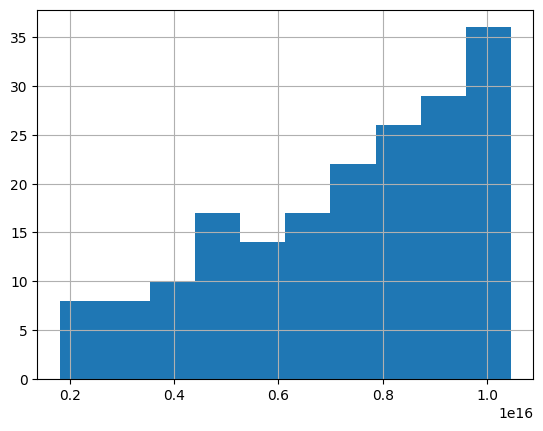

In [ ]:
#Task-7B:Please calculate the duration from the membership date (“üyelik tarihi) until the current date (suppose that the current date is May 2, 2023). Then present these values in a new column with the name total life time. Please also visualize them via the use of hist (histogram) function.

current_time=np.datetime64('2023-05-02')

df['total_lifetime']=current_time-df['uyelik_tarihi']
df['total_lifetime'].astype(int).hist()

<Axes: >

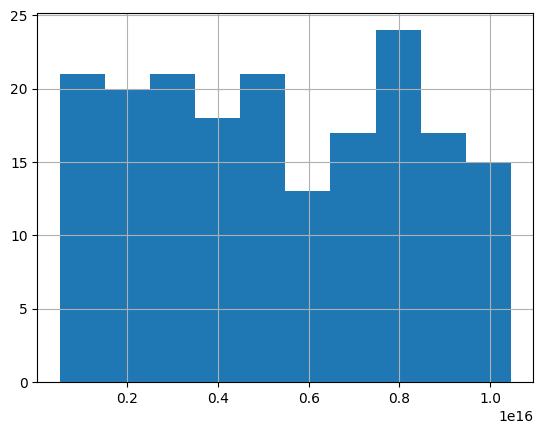

In [ ]:
#Task-7C:Please calculate the duration (in days) from the last purchase/order date until the current date (suppose that the current date is May 2, 2023) and add this into the dataset as “Recency” column. Please also visualize them via the use of hist (histogram) function.

df['Recency']=current_time-df['son_satın_alma']
df['Recency'].astype(int).hist()

<Axes: >

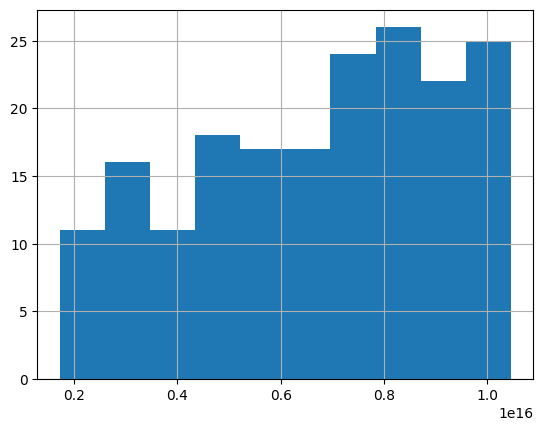

In [ ]:
#Task-7D:Please calculate the duration between the membership date and the first order date to understand if there is a lag in the first order. Please also visualize them via the use of hist (histogram) function.

df['duration_first_sale']=current_time-df['ilk_satın_alma']
df['duration_first_sale'].astype(int).hist()

Text(0.5, 1.0, 'Average Orders Values For Ages')

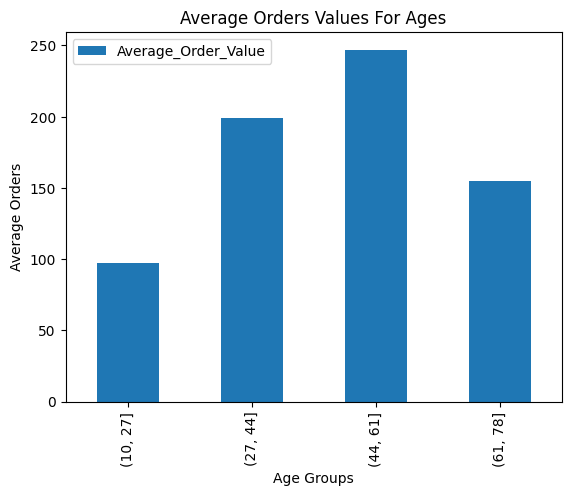

In [8]:
#Task-7E:Please prepare 4 segments with respect to users’ ages that shall be equal in size (quartile). Then prepare a table (pivot table) that will summarize the average order values with respect to each age segment.
yas_grupları=([10,27,44,61,78])
df['age_groups']=pd.cut(df['yas'], yas_grupları)
pivot_aov= df.pivot_table(index='age_groups' ,columns=None, values='Average_Order_Value')
pivot_aov.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Average Order Values')
plt.title('Average Orders Values For Ages')

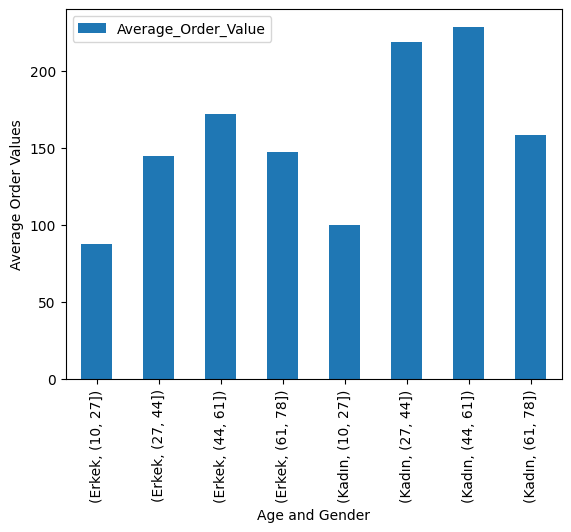

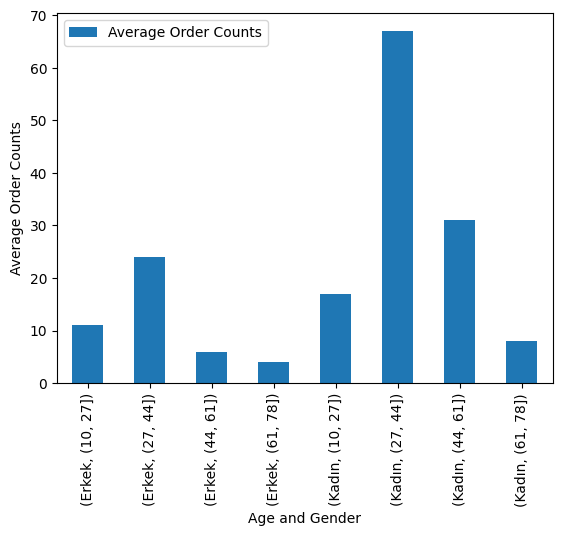

In [17]:
#Task-7F: Please prepare a new table with segmented ages but this time please introduce gender as a new dimension into this table. Moreover, please also show the count values in another pivot table. Please also visualize them via the use of plot function (kind=bar).


pivot_gender= df.pivot_table(index=['cinsiyet','age_groups'],values='Average_Order_Value')
pivot_gender.plot(kind='bar')
plt.xlabel('Age and Gender')
plt.ylabel('Average Order Values')
pivot_gender_count= df.pivot_table(index=['cinsiyet', 'age_groups'], values='Average_Order_Value',aggfunc='count')
pivot_gender_count.plot(kind='bar')
plt.xlabel('Age and Gender')
plt.ylabel('Average Order Counts')
plt.legend(['Average Order Counts'])



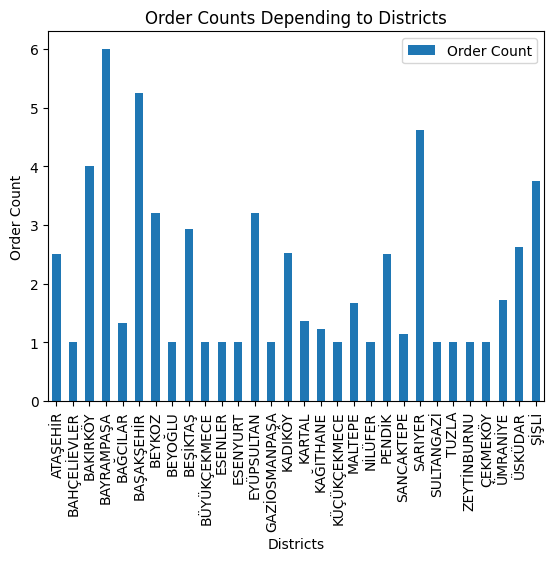

In [34]:
#Task-7G:Please analyze the order counts with respect to different districts (“semt”) to demonstrate that this application is used in which districts more than the other districts.
pivot_oc_semt= df.pivot_table(index=['semt'], columns=None,values='sipariş_adedi')
pivot_oc_semt.plot(kind='bar')
plt.ylabel('Order Count')
plt.xlabel('Districts')
plt.title('Order Counts Depending to Districts')
plt.legend(['Order Count']);

In [28]:
#7G:please try to provide 3-4 segments with respect to these districts that are more abundant in orders and customers just like VIP districts etc.
pivot_oc_semt['segment']= pivot_oc_semt['sipariş_adedi'].apply(lambda x:'silver' if x<=2 else 'gold' if x<=4 and x>=2 else 'platinum' )
pivot_oc_semt

,sipariş_adedi,segment
semt,,
ATAŞEHİR,2.500000,gold
BAHÇELİEVLER,1.000000,silver
BAKIRKÖY,4.000000,gold
BAYRAMPAŞA,6.000000,platinum
BAĞCILAR,1.333333,silver
BAŞAKŞEHİR,5.250000,platinum
BEYKOZ,3.200000,gold
BEYOĞLU,1.000000,silver
BEŞİKTAŞ,2.937500,gold


In [32]:
#Segmenting the scutomer depending on theier spends
#Each segment has customers with an index starting from 0 to last number of member of the class.(Segments are : members, silvers, golds, platinums, diamonds)
members=df.loc[(df['toplam_harcama']<=1200)]
member_count=pd.DataFrame(np.arange(members['uyelik_tarihi'].count()))

silvers=df.loc[(df['toplam_harcama']<=2400)&(df['toplam_harcama']>=1200)]
silver_count=pd.DataFrame(np.arange(silvers['uyelik_tarihi'].count()))

golds=df.loc[(df['toplam_harcama']<=3600)&(df['toplam_harcama']>=2400)]
gold_count= pd.DataFrame(np.arange(golds['uyelik_tarihi'].count()))

platinums=df.loc[(df['toplam_harcama']>=3600) & (df['toplam_harcama']<=4800)]
platinum_count= pd.DataFrame(np.arange(platinums['uyelik_tarihi'].count()))

diamonds= df.loc[(df['toplam_harcama']>=4800)]
diamond_count= pd.DataFrame(np.arange(diamonds['uyelik_tarihi'].count()))




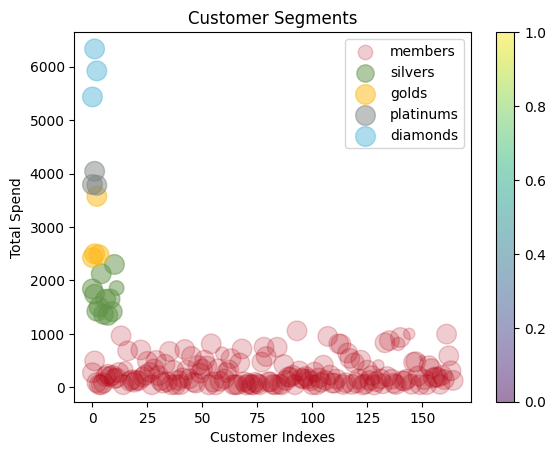

In [33]:
#Visualizing customer outputs depending on their segments
plt.scatter(member_count,members['toplam_harcama'], alpha=0.2, s=5000/members['toplam_indirim_tutarı'], c='#b20011')
plt.scatter(silver_count,silvers['toplam_harcama'], alpha=0.5, s=5000/silvers['toplam_indirim_tutarı'], c='#63954a')
plt.scatter(gold_count, golds['toplam_harcama'], alpha=0.5, c='#fcb814',s=5000/golds['toplam_indirim_tutarı'])
plt.scatter(platinum_count, platinums['toplam_harcama'], alpha=0.5, c='#818784',s=5000/platinums['toplam_indirim_tutarı'])
plt.scatter(diamond_count, diamonds['toplam_harcama'], alpha=0.5, c='#60badd',s=5000/diamonds['toplam_indirim_tutarı'])

plt.xlabel('Customer Indexes')
plt.ylabel('Total Spend')
plt.title('Customer Segments')
plt.legend([('members'),('silvers'),('golds'),('platinums'),('diamonds')])
plt.colorbar()
plt.show()


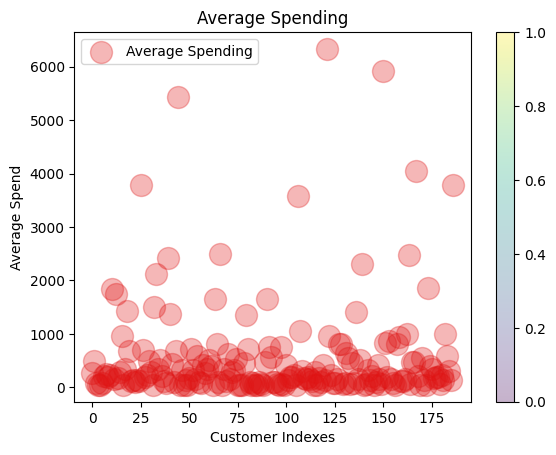

In [ ]:
#All cst in one segment just to see average spending without categorizing too
customer_count= np.arange(df['uyelik_tarihi'].count())

plt.scatter(customer_count, df['toplam_harcama'],alpha=0.3,s=250, c='#DF1313')
plt.colorbar()
plt.xlabel('Customer Indexes')
plt.ylabel('Average Spend')
plt.title('Average Spending')
plt.legend([('Average Spending')])